In [1]:
%%capture
%pip install qiskit pylatexenc matplotlib

In [2]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

simulator = StatevectorSampler()

Vamos desenhar o nosso primeiro circuito quântico.
Primeiro, temos de criar o qubit.

In [3]:
qubits = QuantumRegister(1, name= 'q')

Agora, criamos um circuito com este qubit, para poder fazer operações.

In [4]:
qc = QuantumCircuit(qubits)

Para já, não fazemos nenhuma operação.
Vamos medir para saber que estado é que está a ser preparado.

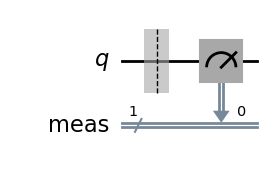

In [5]:
qc.measure_all()
qc.draw('mpl')

In [6]:
qc.draw()

░ ┌─┐
     q: ─░─┤M├
         ░ └╥┘
meas: 1/════╩═
            0

Agora, vamos correr esta "experiência" várias vezes para saber o resultado das medidas.

{'0': 1024}


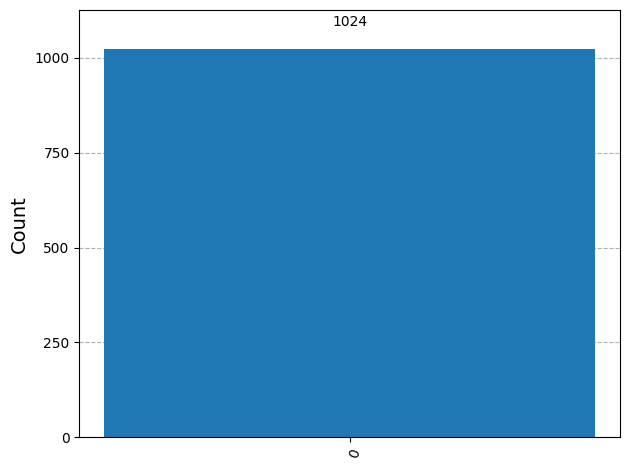

In [7]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas #meas de measure
counts = data.get_counts()

print(counts)
plot_histogram(counts)

Vamos agora fazer a mesma coisa, mas fazendo a operação de "mandar a moeda ao ar".

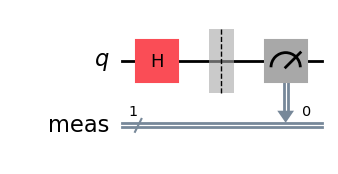

In [8]:
qc = QuantumCircuit(qubits)

# H Operation (toss a coin)
qc.h(qubits[0])

qc.measure_all()
qc.draw('mpl')

In [9]:
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

Simulação

{'1': 520, '0': 504}


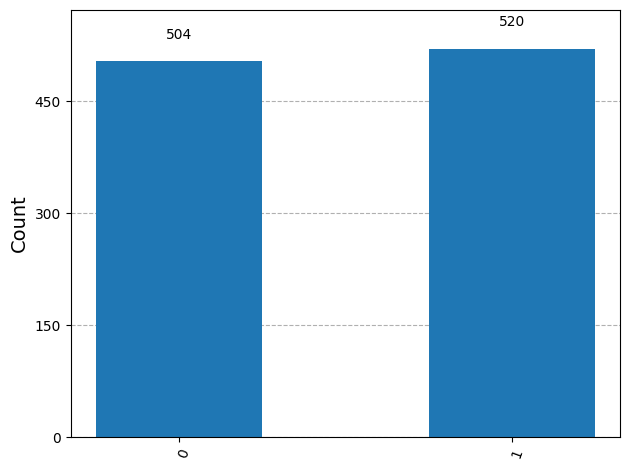

In [10]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas
counts = data.get_counts()

print(counts)
plot_histogram(counts)

E se aplicarmos a operação duas vezes?

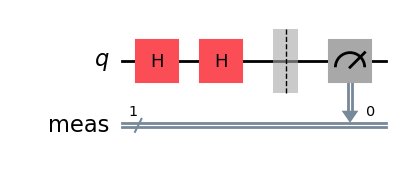

In [11]:
qc = QuantumCircuit(qubits)

qc.h(qubits[0])
qc.h(qubits[0])  # Applying H again to see if we return to the original state

qc.measure_all()
qc.draw('mpl')

{'0': 1024}


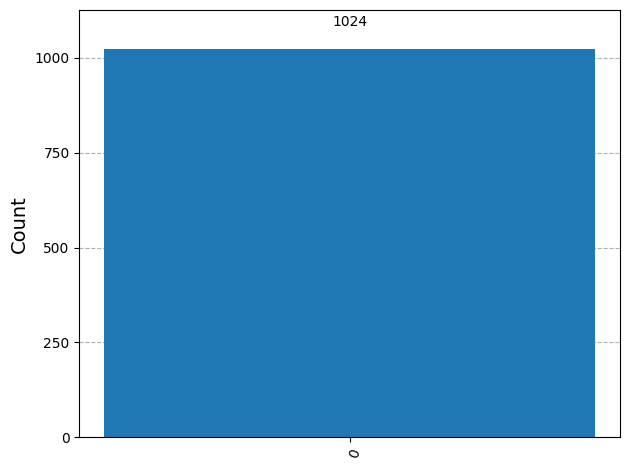

In [12]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas
counts = data.get_counts()

print(counts)
plot_histogram(counts)

Volta tudo ao estado inicial!

Vamos agora ver como preparar o estado $|1⟩$ em vez de $|0⟩$

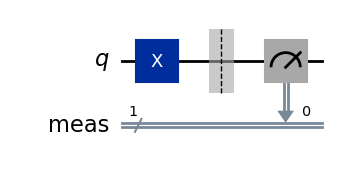

In [13]:
qc = QuantumCircuit(qubits)

qc.x(qubits[0])  # Apply X gate to flip the qubit to |1>
qc.measure_all()
qc.draw('mpl')

{'1': 1024, '0': 0}


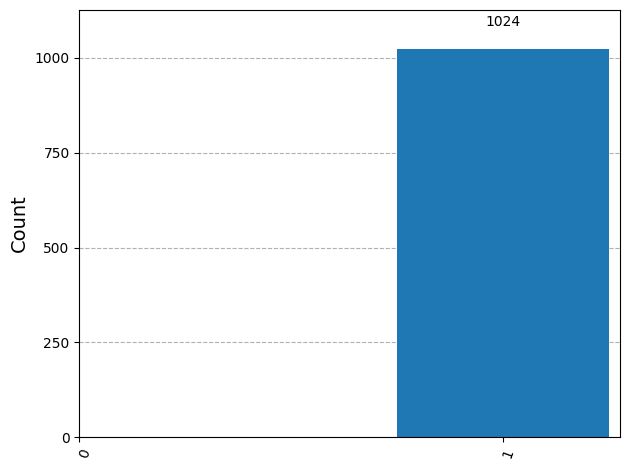

In [14]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas
counts = data.get_counts()

counts['0'] = 0
print(counts)
plot_histogram(counts)

Agora aplicamos a operação $H$ ao estado $|1⟩$.

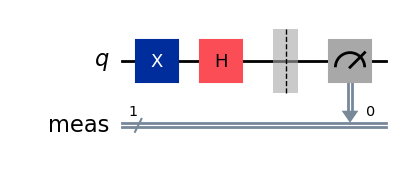

In [15]:
qc = QuantumCircuit(qubits)

qc.x(0)
qc.h(0)

qc.measure_all()
qc.draw('mpl')

{'0': 527, '1': 497}


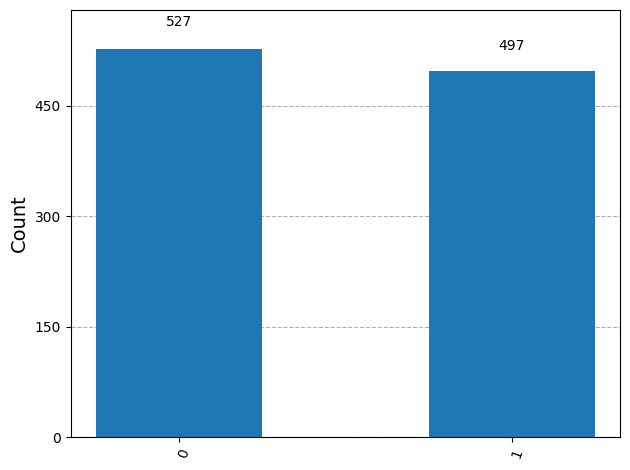

In [16]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas
counts = data.get_counts()

print(counts)
plot_histogram(counts)

Finalmente, se aplicarmos duas vezes $H$ a $|1⟩$:

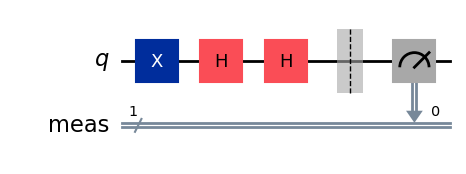

In [17]:
qc = QuantumCircuit(qubits)

qc.x(0)
qc.h(0)
qc.h(0)

qc.measure_all()


qc.draw('mpl')


{'1': 1024}


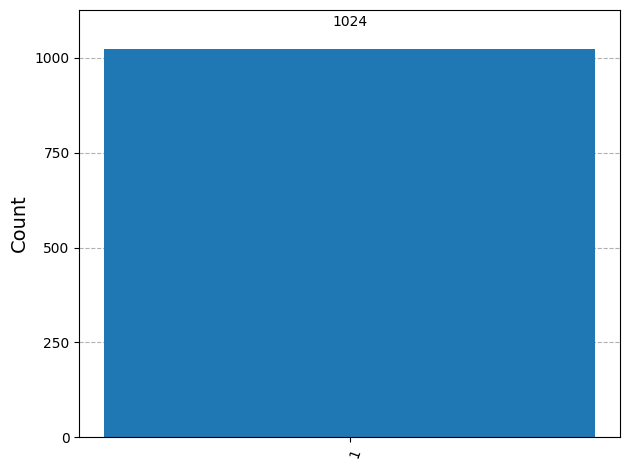

In [18]:
job = simulator.run([qc], shots=1024)
data = job.result()[0].data.meas
counts = data.get_counts()

print(counts)
plot_histogram(counts)